In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
# import xgcm

In [2]:
from dask.distributed import Client
client = Client()
client

/home/jmartine/.miniconda3/envs/py_gcm/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33109 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33109/status,
Dashboard: http://127.0.0.1:33109/status,Workers: 4
Total threads: 8,Total memory: 62.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43383,Workers: 4
Dashboard: http://127.0.0.1:33109/status,Total threads: 8
Started: Just now,Total memory: 62.81 GiB
Comm: tcp://127.0.0.1:35879,Total threads: 2
Dashboard: http://127.0.0.1:41081/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:38229,


In [3]:
import datetime
import nc_time_axis

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy
import matplotlib.path as mpath

In [5]:
PVORT_data_filesREF = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-PVORT/*/*PVORT.nc"
PVORT_data_filesFUT = "/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-PVORT/205*/*PVORT.nc"

grid_files = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc"
coords_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/coordinates_CREG12_lbclnk_noz_vh20160930.nc"
mask_file= "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc"
# bathy_file = "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc"

In [6]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [7]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)
coords = xr.open_mfdataset(coords_file, parallel=True, preprocess=prepro)
mask = xr.open_mfdataset(mask_file, parallel=True, preprocess=prepro)

In [8]:
PVORT_REF = xr.decode_cf(xr.open_mfdataset(PVORT_data_filesREF, coords="minimal", compat="override", parallel=True, decode_cf=False,
                                       preprocess=prepro, chunks={"deptht": 5}))

PVORT_REF = PVORT_REF.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})

In [9]:
PVORT_FUT = xr.decode_cf(xr.open_mfdataset(PVORT_data_filesFUT, coords="minimal", compat="override", parallel=True, decode_cf=False,
                                       preprocess=prepro, chunks={"deptht": 5}))

PVORT_FUT = PVORT_FUT.assign_coords({"nav_lon":grid.nav_lon,"nav_lat":grid.nav_lat})

In [10]:
from utils import *

In [11]:
# fig = plt.figure(figsize=(20, 5))

# ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.NorthPolarStereo(-45))
# ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.NorthPolarStereo(-45))
# ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.NorthPolarStereo(-45))

# PVORT_ref = PVORT_REF.vototvor.mean('time_counter').isel(deptht=1)
# PVORT_ref.plot(x='nav_lon',y='nav_lat',vmin=0, vmax=100, cmap=cmo.thermal, ax=ax1, transform=ccrs.PlateCarree(),rasterized=True)
# PVORT_fut = PVORT_FUT.vototvor.mean('time_counter').isel(deptht=1)
# PVORT_fut.plot(x='nav_lon',y='nav_lat',vmin=0, vmax=100, cmap=cmo.thermal, ax=ax2, transform=ccrs.PlateCarree(),rasterized=True)

# (PVORT_fut-PVORT_ref).plot(x='nav_lon',y='nav_lat',vmin=-100, vmax=100, cmap=cmo.balance, ax=ax3, transform=ccrs.PlateCarree(),rasterized=True)

# ax1.text(-90, 63, "REF\nTemp\n\n1994-2015", transform=ccrs.PlateCarree())
# ax2.text(-90, 63, "FUT\nTemp\n\n2051-2070", transform=ccrs.PlateCarree())
# ax3.text(-90, 61, "FUT-REF\nTemp\n\n", transform=ccrs.PlateCarree())

# [map_config(ax) for ax in [ax1,ax2,ax3]]
# # plt.savefig("figures/CREG12.L75_KE_REF08_2000-2009_vs_FUT08_2060-2069_k00_moorings_bathy.v2.png", dpi=300)

In [12]:
# PVORT_REF.vototvor.isel(deptht=1).groupby('time_counter.season').mean().plot(col="season", col_wrap=2, norm=colors.SymLogNorm(linthresh=1, linscale=1,
#                                               vmin=-1e2, vmax=1e2, base=10))

In [23]:
# idx_i = (_//PVORT_REF.nav_lat.shape[1]).squeeze()
# idx_y = (_%PVORT_REF.nav_lat.shape[1]).squeeze()


x_0 = np.linspace(-150,-150,400)
y_0 = np.linspace(70,90,400)

x_1 = np.linspace(0,0,300)
y_1 = np.linspace(90,75,300)

x_i = np.hstack((x_0,x_1))
y_i = np.hstack((y_0,y_1))

index_y ,index_x = extract_transect(x_i,y_i,PVORT_REF)

In [48]:
x_1 = np.linspace(120,120,400)
y_1 = np.linspace(90,73,400)

index_y1 ,index_x1 = extract_transect(x_1,y_1,PVORT_REF)

In [49]:
# x_0 = np.linspace(500,850,400)
# y_0 = np.linspace(840,455,400)

# x_1 = np.linspace(850,900,400)
# y_1 = np.linspace(455,70,400)

In [50]:
# x_i = np.hstack((x_0,x_1))
# y_i = np.hstack((y_0,y_1))

In [51]:
ds_xi = xr.DataArray(index_x.ravel(), dims=["x_points"])
ds_yi = xr.DataArray(index_y.ravel(), dims=["y_points"])

In [52]:
ds_xi1 = xr.DataArray(index_x1.ravel(), dims=["x_points"])
ds_yi1 = xr.DataArray(index_y1.ravel(), dims=["y_points"])

In [53]:
# PVORT_REF_clim = .mean('time_counter').compute()

In [54]:
# PVORT_FUT_clim = PVORT_FUT.vototvor.isel(deptht=slice(0,40)).mean('time_counter').compute()

In [55]:
transect_REF = PVORT_REF.vototvor.isel(deptht=slice(0,40)).assign_coords({"x":PVORT_REF.x,"y":PVORT_REF.y}).isel(x=ds_xi,y=ds_yi)
transect_FUT = PVORT_FUT.vototvor.isel(deptht=slice(0,40)).assign_coords({"x":PVORT_REF.x,"y":PVORT_REF.y}).isel(x=ds_xi,y=ds_yi)

In [56]:
transect_REF1 = PVORT_REF.vototvor.isel(deptht=slice(0,40)).assign_coords({"x":PVORT_REF.x,"y":PVORT_REF.y}).isel(x=ds_xi1,y=ds_yi1)
transect_FUT1 = PVORT_FUT.vototvor.isel(deptht=slice(0,40)).assign_coords({"x":PVORT_REF.x,"y":PVORT_REF.y}).isel(x=ds_xi1,y=ds_yi1)

In [57]:
diag = xr.DataArray(np.arange(700), dims="diag")
diag_transect_REF = transect_REF.isel(x_points=diag, y_points=diag)
diag_transect_FUT = transect_FUT.isel(x_points=diag, y_points=diag)

In [58]:
diag = xr.DataArray(np.arange(300), dims="diag")
diag_transect_REF1 = transect_REF1.isel(x_points=diag, y_points=diag)
diag_transect_FUT1 = transect_FUT1.isel(x_points=diag, y_points=diag)

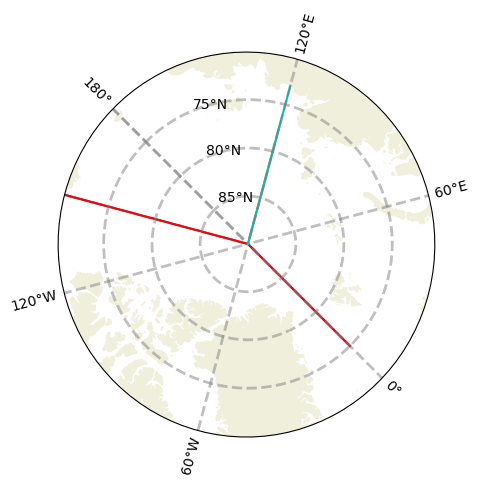

In [59]:
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo(-45))

# PVORT_REF.vototvor.isel(time_counter=0,deptht=1).plot(x='nav_lon',y='nav_lat',transform=ccrs.PlateCarree())

plt.plot(diag_transect_REF.nav_lon,diag_transect_REF.nav_lat ,transform=ccrs.PlateCarree())
plt.plot(x_i,y_i,transform=ccrs.PlateCarree(),color='r')

plt.plot(diag_transect_REF1.nav_lon,diag_transect_FUT1.nav_lat ,transform=ccrs.PlateCarree())
plt.plot(x_1,y_1,transform=ccrs.PlateCarree(),color='c')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.ylocator = mticker.FixedLocator([75,80,85])

[map_config(ax) for ax in [ax1]]

plt.savefig('./figures/transects.png')

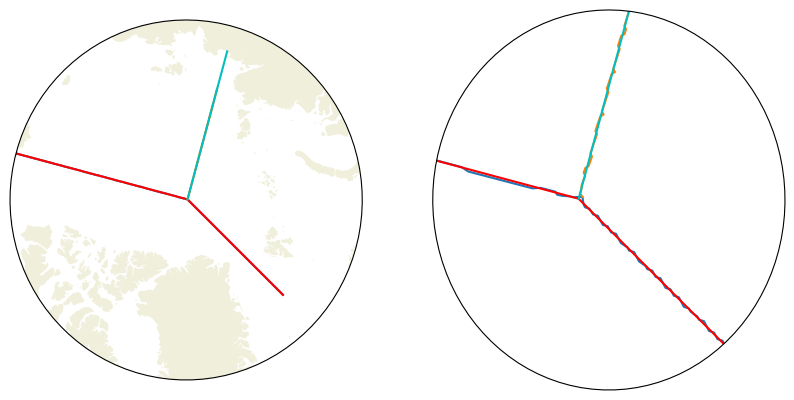

In [60]:

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.NorthPolarStereo(-45))

# PVORT_REF.vototvor.isel(time_counter=0,deptht=1).plot(x='nav_lon',y='nav_lat',transform=ccrs.PlateCarree())

plt.plot(diag_transect_REF.nav_lon,diag_transect_REF.nav_lat ,transform=ccrs.PlateCarree())
plt.plot(x_i,y_i,transform=ccrs.PlateCarree(),color='r')

plt.plot(diag_transect_REF1.nav_lon,diag_transect_FUT1.nav_lat ,transform=ccrs.PlateCarree())
plt.plot(x_1,y_1,transform=ccrs.PlateCarree(),color='c')

[map_config(ax) for ax in [ax1]]


ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.NorthPolarStereo(-45))

# PVORT_REF.vototvor.isel(time_counter=0,deptht=1).plot(x='nav_lon',y='nav_lat',transform=ccrs.PlateCarree())

plt.plot(diag_transect_REF.nav_lon,diag_transect_REF.nav_lat ,transform=ccrs.PlateCarree())
plt.plot(x_i,y_i,transform=ccrs.PlateCarree(),color='r')

plt.plot(diag_transect_REF1.nav_lon,diag_transect_FUT1.nav_lat ,transform=ccrs.PlateCarree())
plt.plot(x_1,y_1,transform=ccrs.PlateCarree(),color='c')

[map_config(ax) for ax in [ax1]]

ax1.set_extent([-180, 180, 88, 90], ccrs.PlateCarree())